In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
import re

from pathlib import Path

# Moons

### 10 runs

In [2]:
ms = [1, 2, 3, 4, 8, 16, 32]
methods = ["FO", "SO", "Rnd", "exact", "MC"]
bounds = ["seeger"]
seeds = "23032021-23032031"
prior = 1

load_dir = Path(f"../results/binary/moons/1000/")

results = {m: {} for m in ms}
for method in methods:
    for M in ms:
        results[M][method] = {}
        for bound in bounds:
            c_dir = load_dir / f"{method}/{bound}/optimize-bound=True/stumps-uniform/M={M}"

#             print(M, method)
#             if method in ["exact", "MC"]:
#                 path = next(c_dir.rglob(f"**/prior={prior}/lr=0.1/seeds={seeds}/**/*.npy"))
#             else:
            path = next(c_dir.rglob(f"**/lr=0.1/seeds={seeds}/**/*.npy"))
            results[M][method][bound] = np.load(path, allow_pickle=True).item()

In [9]:
def draw_bars(ms):
    
    x_pos = np.linspace(0, 0.75*len(methods), len(methods))
    step = len(ms)
    
    plt.figure(figsize=(3*step, 3))
    b = "seeger"
    
    for i, M in enumerate(ms):
        ax = plt.subplot(1, step+1, i + 1)
        test_errors = ([results[M][m][b]["test-error"][0] for m in methods], [results[M][m][b]["test-error"][1] for m in methods])
        bounds = ([results[M][m][b][b][0] for m in methods], [results[M][m][b][b][1] for m in methods])

        plt.bar(x_pos, bounds[0], yerr=bounds[1], alpha=0.8, hatch="//", label="bound", error_kw=dict(lw=3, ecolor="m", capsize=10, capthick=1))
        plt.bar(x_pos, test_errors[0], yerr=test_errors[1], alpha=1, hatch="..", label="test error", error_kw=dict(lw=3, capsize=10, capthick=1, ecolor="m"))

        plt.title(f"M={M*4}", fontsize=15)
        plt.ylim(0, 1)
        ax.set_xticklabels(methods, fontsize=12, rotation=70)    
        ax.set_xticks(x_pos)
        
        if M > 1:
            ax.set_yticks([])
    
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    plt.subplots_adjust(wspace=0)

    plt.savefig(f"moons-test.pdf", bbox_inches="tight")

/home/vale/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator


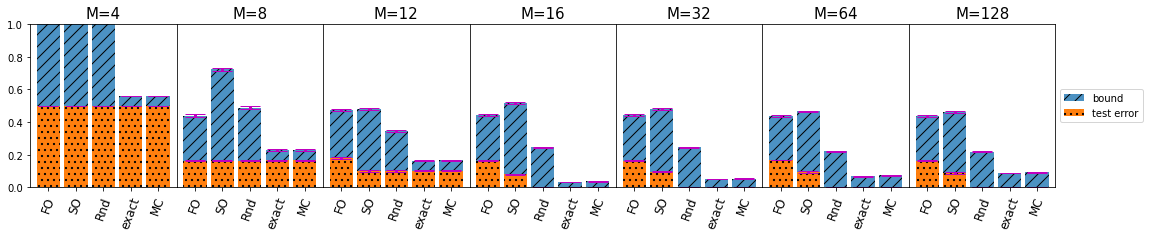

In [10]:
draw_bars(ms)

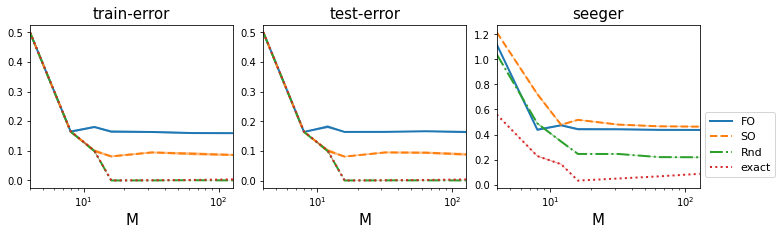

In [7]:
b = "seeger"
plt.figure(figsize=(12,3))

x = [m*4 for m in ms]
for j, e in enumerate(["train-error", "test-error", b]):
    ax = plt.subplot(131 + j)
    for met, s in zip(["FO", "SO", "Rnd", "exact"], ["-", "--", "-.", ":"]):
        y = np.array([results[m][met][b][e][0] for m in ms])
        err = np.array([results[m][met][b][e][1] for m in ms])
        plt.plot(x, y, label=met, linestyle=s, linewidth=2)
        plt.fill_between(x, y-err, y+err, alpha=0.5)
    plt.xlim(min(ms)*4, max(ms)*4)    
    plt.title(e, fontsize=15)
    plt.xlabel("M", fontsize=15)
    plt.xscale("log")

plt.subplots_adjust(wspace=0.15)
plt.legend(bbox_to_anchor=(1, 0.5), fontsize=11)
plt.savefig(f"moons-all-M.pdf", bbox_inches="tight")

In [4]:
M = 4
methods = ["FO", "SO", "Rnd", "exact"]
bounds = ["seeger"]
seeds = "23032021-23032031"
prior = 1
noise = [0, 0.05, 0.1       , 0.12915497, 0.16681005, 0.21544347, 0.27825594, 0.35938137, 0.46415888, 0.59948425, 0.77426368, 1.]

load_dir = Path(f"../results/moons/")

results = {m: {} for m in methods}
for method in methods:
    for n in noise:
        results[method][n] = {}
        for bound in bounds:
            c_dir = load_dir / f"noise={n}/1000/{method}/{bound}/optimize-bound=True/stumps-uniform/M={M}"

#             print(M, method)
#             if method in ["exact", "MC"]:
#                 path = next(c_dir.rglob(f"**/prior={prior}/lr=0.1/seeds={seeds}/**/*.npy"))
#             else:
            path = next(c_dir.rglob(f"**/lr=0.1/seeds={seeds}/**/*.npy"))
            results[method][n] = np.load(path, allow_pickle=True).item()

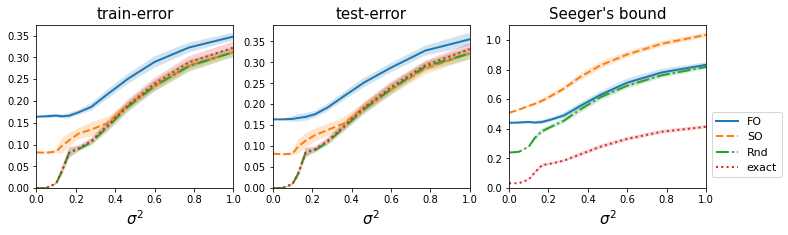

In [5]:
b = "seeger"
plt.figure(figsize=(12,3))

for j, e in enumerate(["train-error", "test-error", b]):
    ax = plt.subplot(131 + j)
    for met, s in zip(methods, ["-", "--", "-.", ":"]):

        y = np.array([results[met][n][e][0] for n in noise])
        err = np.array([results[met][n][e][1] for n in noise])
        plt.plot(noise, y, label=met, linestyle=s, linewidth=2)
        plt.fill_between(noise, y-err, y+err, alpha=0.2)
    plt.xlim(min(noise), max(noise)) 
    if e == b:
        plt.title("Seeger's bound", fontsize=15)
    else:
        plt.title(e, fontsize=15)
    plt.xlabel(r"$\sigma^2$", fontsize=15)
#     plt.xscale("log")
    plt.ylim(0)

plt.subplots_adjust(wspace=0.2)
plt.legend(bbox_to_anchor=(1, 0.5), fontsize=11)
plt.savefig(f"moons-noise.pdf", bbox_inches="tight")